In [2]:
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

In [3]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 999

In [4]:
plt.rcParams["figure.figsize"] = (20,5)

### Import data

In [5]:
df_product = pd.read_pickle('data/all_products_no_dup.pkl')

In [6]:
df_category_map = pd.read_csv('data/category_map.csv')

In [7]:
mapper1 = df_category_map.set_index("category")['Re_category_level1'].to_dict()

In [8]:
mapper2 = df_category_map.set_index("category")['Re_category_level2'].to_dict()

In [9]:
df_reviews = pd.read_pickle('data/all_reviews_no_dup.pkl')

In [10]:
df_product_list = pd.read_parquet('data/sephora_historical_data_april_2020.parquet')

In [11]:
df_product_list['Product_id'] = df_product_list['URL'].str.findall('P[0-9]{4,15}').apply(lambda x: x[0])

In [12]:
len(df_product_list)

9168

In [13]:
#map category
df_product_list['category_level1']= df_product_list['category'].map(mapper1)
df_product_list['category_level2']= df_product_list['category'].map(mapper2)

In [319]:
#df_product_list[df_product_list['category_level1'].isnull()]

In [15]:
df_product_list_2=df_product_list.set_index("Product_id")

In [16]:
mapper_product_category_1 = df_product_list_2['category_level1'].to_dict()
mapper_product_category_2 = df_product_list_2['category_level2'].to_dict()

In [17]:
#check if Kaggle data has any duplication 
df_product_list[df_product_list.duplicated(subset = ['Product_id'])]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Product_id,category_level1,category_level2


In [18]:
#df_product_list["brand"].value_counts()

In [19]:
#df_product_list.groupby('brand').agg({"price":"median"}).sort_values(by = "price", ascending = False)

In [20]:
#how to get the data in scope
df_product_b42020 = df_product_list.loc[(df_product_list["rating"]>=4) & (df_product_list["number_of_reviews"]>=50),:].copy()
#delete the wrong value approx. 20

In [21]:
df_product_b42020.shape

(3960, 24)

In [22]:
df_product_b42020.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Product_id,category_level1,category_level2
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,P163604,Fragrance,Fragrance


In [23]:
#df_product_b42020['number_of_reviews'].describe()

In [24]:
df_product_b42020['number_of_reviews_2020'] = df_product_b42020['number_of_reviews'] 

In [25]:
df_product_b42020['rating_2020'] = df_product_b42020['rating'] 

In [26]:
df_product_b42020_temp=df_product_b42020[['Product_id','name','size','brand','category','category_level1','category_level2','number_of_reviews_2020','rating_2020','love','price','value_price','URL']]

In [27]:
#df_product_b42020_temp.describe()

In [28]:
#total product scrapped
df_product.shape

(4379, 19)

In [29]:
df_product_af2020=df_product.loc[df_product['Product_id_original'].isin(df_product_b42020['Product_id'])].copy()

In [30]:
df_product_af2020.shape

(3902, 19)

In [31]:
df_product_af2020.head(1)

,Product_id_original,Product_id,Name,Brand,BrandExternalId,CategoryId,TotalReviewCount,ReviewStatistics,AverageOverallRating,FirstSubmissionTime,RecommendedCount,NotRecommendedCount,RatingDistribution,ContextDataDistribution.age.Values,ContextDataDistribution.skinType.Values,ContextDataDistribution.skinConcerns.Values,ContextDataDistribution.skinTone.Values,ContextDataDistribution.eyeColor.Values,ContextDataDistribution.hairColor.Values
0,P163604,P163604,Colonia,"{'Id': '5847', 'Name': 'Acqua di Parma'}",5847,cat60150,77,"{'FeaturedReviewCount': 0, 'RecommendedCount':...",4.2987,2008-09-11T23:37:06.000+00:00,9,0,"[{'RatingValue': 1, 'Count': 5}, {'RatingValue...","[{'Value': '18to24', 'Count': 6}, {'Value': '2...","[{'Value': 'normal', 'Count': 3}, {'Value': 'c...",NaN,"[{'Value': 'fair', 'Count': 3}, {'Value': 'lig...","[{'Value': 'blue', 'Count': 2}, {'Value': 'bro...","[{'Value': 'blonde', 'Count': 1}, {'Value': 'b..."


In [32]:
df_product_af2020['number_of_reviews_2021']=df_product_af2020['TotalReviewCount']

In [33]:
df_product_af2020['rating_2021']=df_product_af2020['AverageOverallRating']

In [34]:
df_product_af2020_temp = df_product_af2020[["Product_id_original","number_of_reviews_2021",'rating_2021','FirstSubmissionTime']]

In [35]:
df_product_2020_2021_temp = pd.merge(df_product_af2020_temp,df_product_b42020_temp, left_on = 'Product_id_original', right_on = 'Product_id', how = 'left', indicator = True)

In [36]:
df_product_2020_2021_temp.head(2)

,Product_id_original,number_of_reviews_2021,rating_2021,FirstSubmissionTime,Product_id,name,size,brand,category,category_level1,category_level2,number_of_reviews_2020,rating_2020,love,price,value_price,URL,_merge
0,P163604,77,4.2987,2008-09-11T23:37:06.000+00:00,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,76,4.5,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,both
1,P307801,85,4.5765,2012-05-03T23:42:53.000+00:00,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,79,4.5,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,both


In [37]:
df_product_2020_2021_temp['_merge'].value_counts()

both          3902
right_only       0
left_only        0
Name: _merge, dtype: int64

In [38]:
#selected needed columns
df_product_2020_2021 = df_product_2020_2021_temp[['Product_id','name',"size","brand","category",'category_level1','category_level2',"price",'value_price','URL','love','FirstSubmissionTime',
                           'number_of_reviews_2021','number_of_reviews_2020','rating_2021','rating_2020']].copy()

In [39]:
df_product_2020_2021['number_of_reviews_2021'] =df_product_2020_2021['number_of_reviews_2021'].astype(int)

In [40]:
df_product_2020_2021.describe()

,price,value_price,love,number_of_reviews_2021,number_of_reviews_2020,rating_2021,rating_2020
count,3902.000000,3902.000000,3.902000e+03,3902.000000,3902.000000,3902.000000,3902.000000
mean,45.323232,45.915210,3.150538e+04,743.055613,585.184777,4.267932,4.307022
std,36.530425,37.312424,5.977794e+04,1422.549170,1234.555546,0.255770,0.271800
min,2.000000,2.000000,0.000000e+00,4.000000,50.000000,3.120300,4.000000
25%,25.000000,25.000000,6.825000e+03,135.250000,108.000000,4.087575,4.000000
50%,34.000000,34.000000,1.420000e+04,292.000000,231.000000,4.280800,4.500000
75%,54.000000,54.000000,3.250000e+04,747.000000,613.000000,4.455050,4.500000
max,549.000000,549.000000,1.300000e+06,19576.000000,19000.000000,4.921900,5.000000


there are 58 products have no reviews in April 2021: 3960-3902; reasons: products no longer existed or Sephera has clear all reviews of the product

3902 products are the final products in this analysis 

In [41]:
df_product_2020_2021['product_life'] = (pd.to_datetime("2021-04-01")-pd.to_datetime(df_product_2020_2021["FirstSubmissionTime"]).dt.tz_localize(None))/pd.Timedelta('365D')

<AxesSubplot:ylabel='Frequency'>

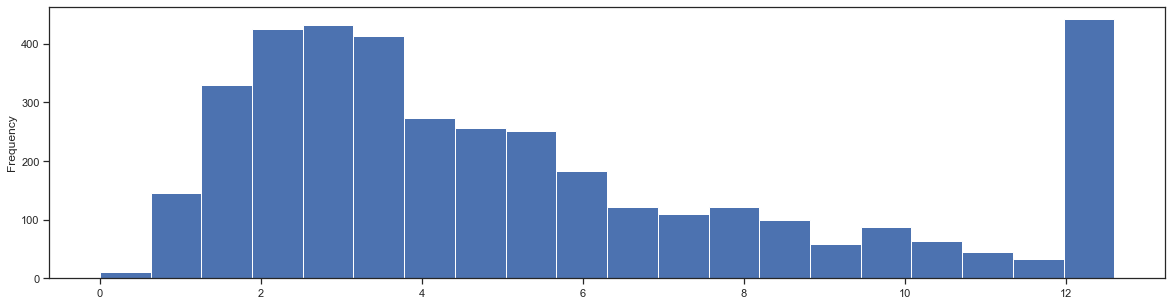

In [42]:
df_product_2020_2021['product_life'].plot(kind = 'hist', bins = 20)

In [314]:
df_product_2020_2021.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,number_of_reviews_2021,number_of_reviews_2020,rating_2021,rating_2020,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021_pandamic,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff
0,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,2700,2008-09-11T23:37:06.000+00:00,77,76,4.2987,4.5,12.558948,True,True,1,6.131087,6.574993,-0.443906
1,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,2600,2012-05-03T23:42:53.000+00:00,85,79,4.5765,4.5,8.915101,True,True,6,9.534384,9.980921,-0.446537


<AxesSubplot:ylabel='Frequency'>

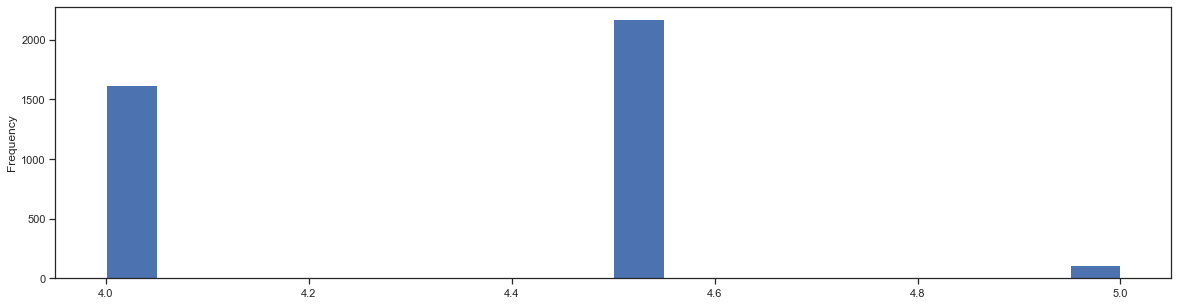

In [316]:
df_product_2020_2021['rating_2020'].plot(kind = 'hist', bins = 20)

<AxesSubplot:ylabel='Frequency'>

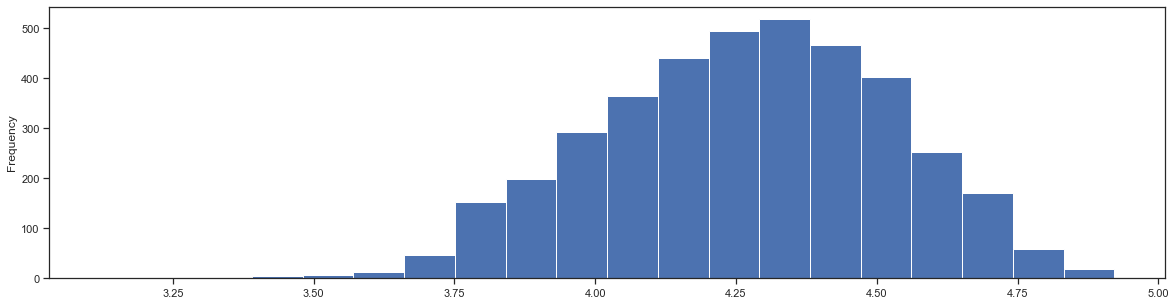

In [317]:
df_product_2020_2021['rating_2021'].plot(kind = 'hist', bins = 20)

# How to fill in na

In [43]:
#tag product_life more than 1 year 
df_product_2020_2021['product_life_above_1'] = df_product_2020_2021['product_life'].\
                                               apply(lambda x: 'True' if x >=1 else 'False')

In [44]:
df_product_2020_2021['product_life_above_1'].value_counts()

True     3888
False      14
Name: product_life_above_1, dtype: int64

In [45]:
#tag product_life more than 2 year 
df_product_2020_2021['product_life_above_2'] = df_product_2020_2021['product_life'].\
                                               apply(lambda x: 'True' if x >=2 else 'False')

In [46]:
df_product_2020_2021['product_life_above_2'].value_counts()

True     3317
False     585
Name: product_life_above_2, dtype: int64

In [47]:
#df_product_2020_2021.loc[(df_product_2020_2021['product_life']-1)<0,["number_of_reviews_2020",'rating_2020']]=0

In [48]:
#note that the review number decreased for some products 
df_product_2020_2021['number_of_reviews_2021_pandamic'] = df_product_2020_2021['number_of_reviews_2021']  - df_product_2020_2021['number_of_reviews_2020'] 

In [49]:
df_product_2020_2021['number_of_reviews_avg_2021'] =df_product_2020_2021["number_of_reviews_2021"]/ df_product_2020_2021['product_life']

In [50]:
df_product_2020_2021['number_of_reviews_avg_2020'] =df_product_2020_2021["number_of_reviews_2020"]/ (df_product_2020_2021['product_life']-1)

In [51]:
df_product_2020_2021['number_of_reviews_avg_diff'] = df_product_2020_2021['number_of_reviews_avg_2021']  - df_product_2020_2021['number_of_reviews_avg_2020'] 

In [52]:
df_product_list[df_product_list['Product_id'] == 'P236816']

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Product_id,category_level1,category_level2
2088,2324705,Dior,Lip Balm & Treatment,Dior Lip Glow,0.12 fl oz/ 3.5 g,4.5,4000,288200,34.0,34.0,https://www.sephora.com/product/dior-addict-li...,True,exclusive,no options,What it is: A sheer balm in two finishes that ...,Suggested Usage:-Wear it alone- below- or on t...,A C10-30 Cholesterol/Lanosterol Esters- Diisos...,0,1,0,0,P236816,Skincare,Lip Skincare


In [53]:
# there are 14 products are new/upgraded. They have reviews before 2020.4. however, there is some update, the first submission date is after 2020.4. 
# Therefore, we treated them as new products launched during pandamic. 
(df_product_2020_2021['number_of_reviews_avg_2020']<0).sum()

14

In [54]:
#df_product_2020_2021['brand'].value_counts()

<AxesSubplot:ylabel='Frequency'>

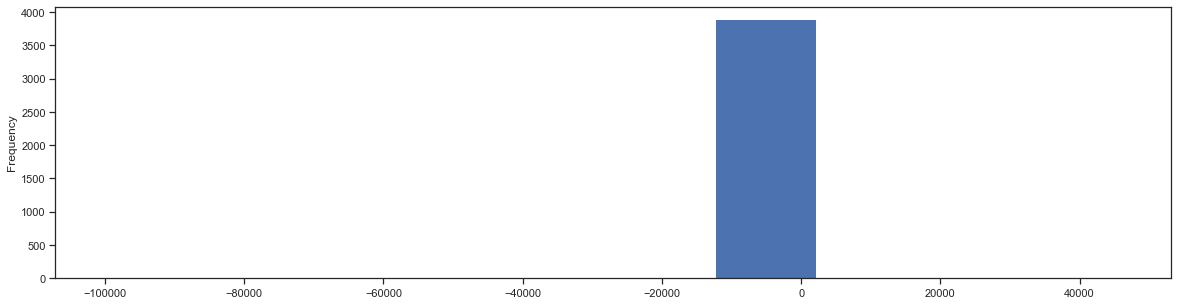

In [55]:
df_product_2020_2021['number_of_reviews_avg_diff'].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

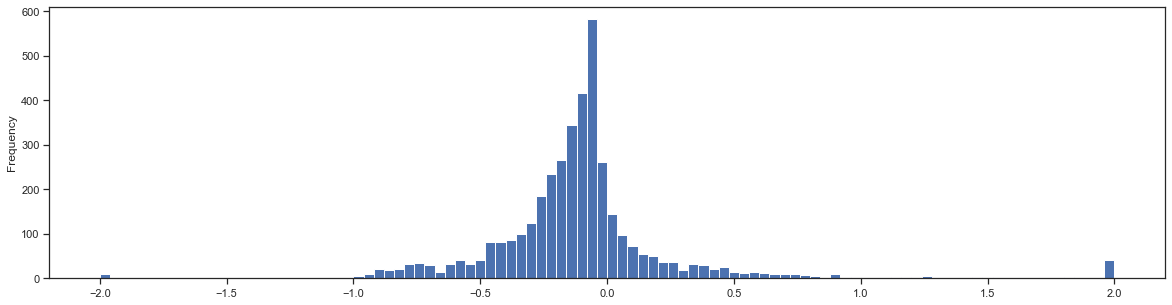

In [56]:
(df_product_2020_2021['number_of_reviews_avg_diff'].div(df_product_2020_2021['number_of_reviews_avg_2020'])).clip(-2,2).plot(kind = "hist", bins = 100)

In [57]:
df_category = (df_product_2020_2021.set_index('category_level1')['number_of_reviews_avg_diff'].\
               div(df_product_2020_2021.set_index('category_level1')['number_of_reviews_avg_2020'])).clip(-2,2)

In [58]:
#for i in df_category.index[:5]:
 #   plt.hist(df_category.loc[i], bins = 30, alpha = 0.2);
    

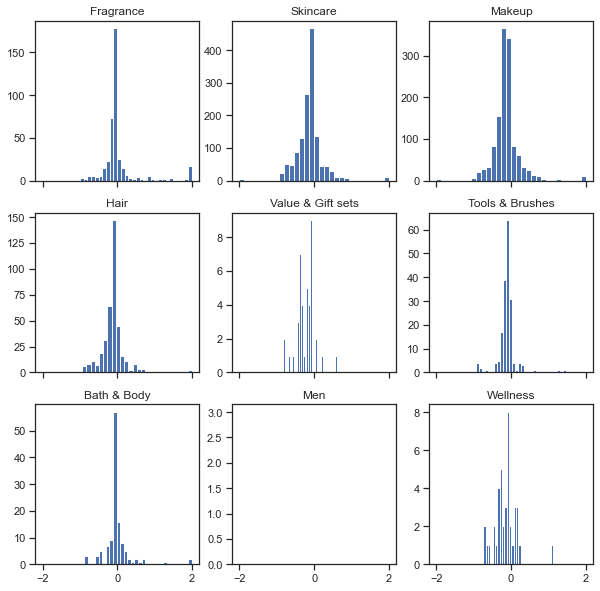

In [59]:
figure, axes = plt.subplots(3,3, figsize = (10,10), sharex = True)
for i,ax in zip(df_category.index.unique(),
            axes.reshape(-1)):
    ax.hist(df_category.loc[i], bins = 30);
    ax.set_title(i)

In [60]:
df_product_2020_2021.sort_values(by ="number_of_reviews_2021_pandamic" , ascending=False)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,number_of_reviews_2021,number_of_reviews_2020,rating_2021,rating_2020,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021_pandamic,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff
3818,P427030,Black Opium Eau de Parfum Rollerball,0.34 oz/ 10 mL,Yves Saint Laurent,Rollerballs & Travel Size,Fragrance,Fragrance,29.0,29.0,https://www.sephora.com/product/black-opium-ro...,19000,2015-02-26T17:39:50.000+00:00,6673,121,4.6598,4.5,6.096614,True,True,6552,1094.542039,23.741254,1070.800785
2100,P420652,Lip Sleeping Mask,0.7 oz/ 20 g,LANEIGE,Lip Balms & Treatments,Skincare,Lip Skincare,20.0,20.0,https://www.sephora.com/product/lip-sleeping-m...,355400,2017-06-13T16:40:53.000+00:00,13236,9000,4.3994,4.5,3.800835,True,True,4236,3482.392265,3213.326929,269.065336
2601,P427417,Niacinamide 10% + Zinc 1%,no size,The Ordinary,Face Serums,Skincare,Face Skincare,5.9,5.9,https://www.sephora.com/product/the-ordinary-d...,225500,2017-12-20T19:28:36.000+00:00,4349,1000,4.2474,4.0,3.279968,True,True,3349,1325.927401,438.602567,887.324835
312,P394639,The True Cream Aqua Bomb,no size,belif,Moisturizers,Skincare,Face Skincare,38.0,38.0,https://www.sephora.com/product/the-true-cream...,180000,2015-03-03T20:13:28.000+00:00,6065,3000,4.4872,4.5,6.082623,True,True,3065,997.102766,590.246440,406.856327
3562,P441813,Hydro Grip Primer,no size,MILK MAKEUP,Face Primer,Makeup,Foundation & Primer,30.0,30.0,https://www.sephora.com/product/hydro-grip-pri...,82700,2019-02-28T05:48:25.000+00:00,3636,1000,4.0418,4.0,2.089748,True,True,2636,1739.922654,917.643290,822.279364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,P309813,Eyeshadow,0.05 oz/ 1.5 g,Urban Decay,Eyeshadow,Makeup,Eyeshadow,20.0,20.0,https://www.sephora.com/product/eyeshadow-P309...,361400,2021-03-03T21:26:10.000+00:00,168,2000,4.5238,4.5,0.077005,False,False,-1832,2181.676227,-2166.858999,4348.535226
1563,P424902,Ambient Strobe Lighting Powder Mini,0.04 oz/ 1.3 g,Hourglass,Makeup,Makeup,Makeup Mini,24.0,24.0,https://www.sephora.com/product/ambient-strobe...,10700,2017-10-16T23:23:45.000+00:00,66,2000,4.4545,4.5,3.457603,True,True,-1934,19.088367,813.801019,-794.712651
3257,P420027,Photo Finish Even Skintone Primer,1 oz/ 30 mL,Smashbox,Face Primer,Makeup,Foundation & Primer,39.0,39.0,https://www.sephora.com/product/photo-finish-c...,5800,2017-04-15T07:39:59.000+00:00,39,2000,3.5641,4.0,3.963508,True,True,-1961,9.839767,674.875765,-665.035998
957,P236816,Dior Lip Glow,0.12 fl oz/ 3.5 g,Dior,Lip Balm & Treatment,Skincare,Lip Skincare,34.0,34.0,https://www.sephora.com/product/dior-addict-li...,288200,2021-03-20T01:08:58.000+00:00,1367,4000,4.5252,4.5,0.032745,False,False,-2633,41746.197691,-4135.416262,45881.613953


In [61]:
#the data scrapped from Sephera is in SKU level (e.g. same product but different color). however, the kaggle data is in product family level. 
#the name is the product family name. Supernova Crushed Diamond Highlighter Pure(SKU id: 2325223) vs Supernova Crushed Diamond Highlighter
#The review is related to the product family. Therefore, we only care on product family level. 
df_product_list.loc[df_product_list['Product_id']=="P454768",:]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Product_id,category_level1,category_level2
59,2325223,Aether Beauty,Highlighter,Supernova Crushed Diamond Highlighter,0.37 fl oz/ 10.5 g,5.0,59,3900,38.0,38.0,https://www.sephora.com/product/aether-beauty-...,False,0,no options,What it is: A super-soft- ethereal glow highli...,Suggested Usage:-Can be used on cheeks- eyes- ...,-Ethically Sourced Diamond Powder: Helps to p...,0,0,0,0,P454768,Makeup,Highlighter


# Review level analysis 

In [62]:
df_reviews.head(2)

,Id,ProductId,Rating,Title,ReviewText,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,ContextDataDistribution.skinConcerns.ValueLabel,Product_id_original
0,173658866,P443401,2,Too similar and no lasting power,I bought this because I already love Arancia d...,False,2021-02-15T18:09:41.000+00:00,Combination,Blue,Blonde,Fair,NaN,NaN,P443401
1,173618877,P443401,1,None,Why is this 82$ when the value is lower? That ...,False,2021-02-14T17:22:53.000+00:00,Combination,Green,Blonde,Fair,NaN,NaN,P443401


In [63]:
df_reviews['review_submission_time']=pd.to_datetime(df_reviews["SubmissionTime"]).dt.tz_localize(None)

In [64]:
df_reviews_2021 = df_reviews.loc[df_reviews['review_submission_time']>= pd.to_datetime("2020-04-01"),:].copy()

In [65]:
df_reviews_2021_temp = df_reviews_2021.groupby('Product_id_original').agg({"Rating": "mean", "Id": "count",'review_submission_time':'min'})\
.reset_index().rename(columns = {"Product_id_original":'Product_id', 'Rating':'r_Rating_avg_2021',\
                                 'Id':'r_Review_count_2021','review_submission_time':'r_Submission_min_2021'})

In [66]:
df_reviews_2021_temp.shape

(4224, 4)

In [67]:
# first filter all submission time after 2020-4-1, then filter the min submission time is before 2020-5-1
# there are the product that have full reviews of 2020-4 to 2021 
df_reviews_2021_temp_1year = df_reviews_2021_temp[df_reviews_2021_temp['r_Submission_min_2021']< pd.to_datetime('2020-05-01')]

In [68]:
df_reviews_2021_temp_1year.head(2)

,Product_id,r_Rating_avg_2021,r_Review_count_2021,r_Submission_min_2021
0,P04546871,4.203704,54,2020-04-01 18:47:53
1,P04897543,4.031915,94,2020-04-04 03:09:44


In [69]:
df_reviews_2021_temp_1year.shape

(3533, 4)

In [70]:
3533/4224

0.8364109848484849

### 99% products have product life more than 1 year. However, due to the limit of scraping (latest 3100 review), the review data will only cover 83d%. The rest 16% we will fillna with (review count 2021 - review count 2020) and rating 2021

In [71]:
df_reviews_2020 = df_reviews.loc[(df_reviews['review_submission_time']>= pd.to_datetime("2019-04-01")) &\
                                 (df_reviews['review_submission_time']< pd.to_datetime("2020-04-01")) ,:].copy()

In [72]:
df_reviews_2020_temp = df_reviews_2020.groupby('Product_id_original').agg({"Rating": "mean", "Id": "count",'review_submission_time':'min'})\
.reset_index().rename(columns = {"Product_id_original":'Product_id', 'Rating':'r_Rating_avg_2020',\
                                 'Id':'r_Review_count_2020','review_submission_time':'r_Submission_min_2020'})

In [73]:
df_reviews_2020_temp.shape

(4255, 4)

In [74]:
df_reviews_2020_temp.head(3)

,Product_id,r_Rating_avg_2020,r_Review_count_2020,r_Submission_min_2020
0,P04546871,4.028881,277,2019-04-01 01:47:14
1,P04897543,3.763713,237,2019-04-02 19:32:55
2,P0771,5.000000,2,2019-12-08 00:13:28


In [75]:
df_reviews_2020_temp_2year = df_reviews_2020_temp[df_reviews_2020_temp['r_Submission_min_2020']< pd.to_datetime('2019-05-01')]

In [76]:
df_reviews_2020_temp_2year.shape

(2878, 4)

In [77]:
2878/4255

0.6763807285546416

In [78]:
df_reviews_2020_temp_2year.head(2)

,Product_id,r_Rating_avg_2020,r_Review_count_2020,r_Submission_min_2020
0,P04546871,4.028881,277,2019-04-01 01:47:14
1,P04897543,3.763713,237,2019-04-02 19:32:55


### 85% products have product life more than 2 years. However, due to the limit of scraping (latest 3100 review), the review data will only cover 68%. The rest 17% we will fillna with (review count aveverage 2020) and rating 2020

# Analysis part:
- two years product life: we can compare the consumer beheavior change
- at least one year product: only analyze the performance in the year. the top 

### Two years combine
the scope is only the 85% products have product life more than 2 years. 
### For 2019-2020
- However, due to the limit of scraping (latest 3100 review), the review data will only cover 68%. 
-T he rest 17% we will fillna with (review count aveverage 2020) and rating 2020

### For 2020-2021
- However, due to the limit of scraping (latest 3100 review), the review data will only cover 83d%. 
- The rest 16% we will fillna with (review count 2021 - review count 2020) and rating 2021

In [79]:
df_product_2020_2021.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,number_of_reviews_2021,number_of_reviews_2020,rating_2021,rating_2020,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021_pandamic,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff
0,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,2700,2008-09-11T23:37:06.000+00:00,77,76,4.2987,4.5,12.558948,True,True,1,6.131087,6.574993,-0.443906
1,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,2600,2012-05-03T23:42:53.000+00:00,85,79,4.5765,4.5,8.915101,True,True,6,9.534384,9.980921,-0.446537


In [80]:
df_reviews_2021_temp_1year.head(2)

,Product_id,r_Rating_avg_2021,r_Review_count_2021,r_Submission_min_2021
0,P04546871,4.203704,54,2020-04-01 18:47:53
1,P04897543,4.031915,94,2020-04-04 03:09:44


In [81]:
df_product_review_temp1 = pd.merge(df_product_2020_2021, df_reviews_2021_temp_1year, on = 'Product_id', how = "left", indicator = True)

In [82]:
df_product_review_temp1['_merge'].value_counts()

both          3294
left_only      608
right_only       0
Name: _merge, dtype: int64

In [83]:
df_product_review_temp1['r_Rating_avg_2021']

0            NaN
1       4.500000
2            NaN
3            NaN
4       4.533333
          ...   
3897    4.260870
3898    3.923077
3899         NaN
3900         NaN
3901    4.666667
Name: r_Rating_avg_2021, Length: 3902, dtype: float64

In [84]:
df_product_review_temp1.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,number_of_reviews_2021,number_of_reviews_2020,rating_2021,rating_2020,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021_pandamic,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff,r_Rating_avg_2021,r_Review_count_2021,r_Submission_min_2021,_merge
0,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,2700,2008-09-11T23:37:06.000+00:00,77,76,4.2987,4.5,12.558948,True,True,1,6.131087,6.574993,-0.443906,NaN,NaN,NaT,left_only
1,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,2600,2012-05-03T23:42:53.000+00:00,85,79,4.5765,4.5,8.915101,True,True,6,9.534384,9.980921,-0.446537,4.5,6.0,2020-04-15 20:22:49,both


In [85]:
df_product_review_temp1['Calculated_Rating_avg_2020-2021']= df_product_review_temp1['r_Rating_avg_2021'].fillna(df_product_review_temp1["rating_2021"])

In [86]:
df_product_review_temp1['number_of_reviews_2021_pandamic_calculated']= df_product_review_temp1['r_Review_count_2021'].fillna(df_product_review_temp1["number_of_reviews_2021_pandamic"])

In [87]:
df_product_review_temp1.to_csv('data/review compare 2021.csv')

In [88]:
df_product_review_temp2_list = ['Product_id','name',"size","brand","category","category_level1","category_level2","price",'value_price','URL','love',
                                'FirstSubmissionTime','product_life','product_life_above_1','product_life_above_2',
                                'number_of_reviews_2021','number_of_reviews_2020',
                                'number_of_reviews_avg_2021',
                                'rating_2021','rating_2020','number_of_reviews_avg_2020','number_of_reviews_avg_diff',
                                'number_of_reviews_2021_pandamic_calculated','Calculated_Rating_avg_2020-2021',
                                 'r_Submission_min_2021']

In [89]:
df_product_review_temp2= df_product_review_temp1.loc[:,df_product_review_temp2_list].copy()

In [90]:
df_product_review_temp2.describe()

,price,value_price,love,product_life,number_of_reviews_2021,number_of_reviews_2020,number_of_reviews_avg_2021,rating_2021,rating_2020,number_of_reviews_avg_2020,number_of_reviews_avg_diff,number_of_reviews_2021_pandamic_calculated,Calculated_Rating_avg_2020-2021
count,3902.000000,3902.000000,3.902000e+03,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,45.323232,45.915210,3.150538e+04,5.353681,743.055613,585.184777,183.296322,4.267932,4.307022,300.663103,-117.366781,93.734751,4.073619
std,36.530425,37.312424,5.977794e+04,3.542106,1422.549170,1234.555546,842.373333,0.255770,0.271800,1776.135527,1924.866508,225.057840,0.500256
min,2.000000,2.000000,0.000000e+00,-0.001762,4.000000,50.000000,-23265.425101,3.120300,4.000000,-4193.385279,-99858.969066,-2633.000000,1.000000
25%,25.000000,25.000000,6.825000e+03,2.612196,135.250000,108.000000,32.200060,4.087575,4.000000,35.529255,-31.604248,10.000000,3.839771
50%,34.000000,34.000000,1.420000e+04,4.178689,292.000000,231.000000,72.916675,4.280800,4.500000,83.950691,-5.087834,29.000000,4.153846
75%,54.000000,54.000000,3.250000e+04,7.440032,747.000000,613.000000,192.455587,4.455050,4.500000,228.666087,-0.633540,84.000000,4.400000
max,549.000000,549.000000,1.300000e+06,12.599399,19576.000000,19000.000000,41746.197691,4.921900,5.000000,100021.801386,45881.613953,4236.000000,5.000000


In [91]:
df_reviews_2020_temp_2year.head(2)

,Product_id,r_Rating_avg_2020,r_Review_count_2020,r_Submission_min_2020
0,P04546871,4.028881,277,2019-04-01 01:47:14
1,P04897543,3.763713,237,2019-04-02 19:32:55


In [92]:
df_product_review_temp3 = pd.merge(df_product_review_temp2, df_reviews_2020_temp_2year, on = 'Product_id', how = "left", indicator = True)

In [93]:
df_product_review_temp3['_merge'].value_counts()

both          2747
left_only     1155
right_only       0
Name: _merge, dtype: int64

In [94]:
df_product_review_temp3.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021,number_of_reviews_2020,number_of_reviews_avg_2021,rating_2021,rating_2020,number_of_reviews_avg_2020,number_of_reviews_avg_diff,number_of_reviews_2021_pandamic_calculated,Calculated_Rating_avg_2020-2021,r_Submission_min_2021,r_Rating_avg_2020,r_Review_count_2020,r_Submission_min_2020,_merge
0,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,2700,2008-09-11T23:37:06.000+00:00,12.558948,True,True,77,76,6.131087,4.2987,4.5,6.574993,-0.443906,1.0,4.2987,NaT,NaN,NaN,NaT,left_only
1,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,2600,2012-05-03T23:42:53.000+00:00,8.915101,True,True,85,79,9.534384,4.5765,4.5,9.980921,-0.446537,6.0,4.5000,2020-04-15 20:22:49,4.705882,51.0,2019-04-11 00:01:53,both


In [95]:
df_product_review_temp3['Calculated_Rating_avg_2019-2020']= df_product_review_temp3['r_Rating_avg_2020'].fillna(df_product_review_temp3["rating_2020"])

In [96]:
df_product_review_temp3['number_of_reviews_2020_b4pandamic']= df_product_review_temp3['r_Review_count_2020'].fillna(df_product_review_temp3["number_of_reviews_avg_2021"])

In [99]:
df_product_review_temp3_list = ['Product_id','name',"size","brand","category","category_level1","category_level2","price",'value_price','URL','love',
                                'FirstSubmissionTime','product_life','product_life_above_1','product_life_above_2',
                                'number_of_reviews_2021','number_of_reviews_2020',
                                'number_of_reviews_avg_2021','number_of_reviews_avg_2020','number_of_reviews_avg_diff',
                                'rating_2021', 'rating_2020',
                                'number_of_reviews_2021_pandamic_calculated','number_of_reviews_2020_b4pandamic',
                                'Calculated_Rating_avg_2020-2021','Calculated_Rating_avg_2019-2020',
                                 'r_Submission_min_2021']

In [100]:
df_product_review_finall_all = df_product_review_temp3.loc[:,df_product_review_temp3_list].copy()

In [320]:
df_product_review_finall_all.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021,number_of_reviews_2020,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff,rating_2021,rating_2020,number_of_reviews_2021_pandamic_calculated,number_of_reviews_2020_b4pandamic,Calculated_Rating_avg_2020-2021,Calculated_Rating_avg_2019-2020,r_Submission_min_2021,2_year_product_review_diff,2_year_product_rating_diff
0,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,2700,2008-09-11T23:37:06.000+00:00,12.558948,True,True,77,76,6.131087,6.574993,-0.443906,4.2987,4.5,1.0,6.131087,4.2987,4.500000,NaT,-5.131087,-0.201300
1,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,2600,2012-05-03T23:42:53.000+00:00,8.915101,True,True,85,79,9.534384,9.980921,-0.446537,4.5765,4.5,6.0,51.000000,4.5000,4.705882,2020-04-15 20:22:49,-45.000000,-0.205882


In [103]:
df_product_review_finall_all.shape


(3902, 27)

In [106]:
#Analyze product life more than 2 years. we can compare the before pandamic vs pandamic 
df_product_review_finall_all['2_year_product_review_diff'] = df_product_review_finall_all['number_of_reviews_2021_pandamic_calculated']-\
                                                            df_product_review_finall_all['number_of_reviews_2020_b4pandamic']


In [107]:
df_product_review_finall_all['2_year_product_rating_diff'] = df_product_review_finall_all['Calculated_Rating_avg_2020-2021']-\
                                                            df_product_review_finall_all['Calculated_Rating_avg_2019-2020']


In [321]:
df_product_review_finall_all.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021,number_of_reviews_2020,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff,rating_2021,rating_2020,number_of_reviews_2021_pandamic_calculated,number_of_reviews_2020_b4pandamic,Calculated_Rating_avg_2020-2021,Calculated_Rating_avg_2019-2020,r_Submission_min_2021,2_year_product_review_diff,2_year_product_rating_diff
0,P163604,Colonia,0.7 oz/ 20 mL,Acqua Di Parma,Cologne,Fragrance,Fragrance,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,2700,2008-09-11T23:37:06.000+00:00,12.558948,True,True,77,76,6.131087,6.574993,-0.443906,4.2987,4.5,1.0,6.131087,4.2987,4.500000,NaT,-5.131087,-0.201300
1,P307801,Fico di Amalfi,5 oz/ 148 mL,Acqua Di Parma,Perfume,Fragrance,Fragrance,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,2600,2012-05-03T23:42:53.000+00:00,8.915101,True,True,85,79,9.534384,9.980921,-0.446537,4.5765,4.5,6.0,51.000000,4.5000,4.705882,2020-04-15 20:22:49,-45.000000,-0.205882


## Category level analysis 

In [108]:
df_product_review_finall_all['category_level1'].value_counts()

Skincare             1393
Makeup               1288
Fragrance             405
Hair                  386
Tools & Brushes       182
Bath & Body           124
Value & Gift sets      49
Wellness               40
Nail                   23
Men                    12
Name: category_level1, dtype: int64

In [323]:
#df_product_review_finall_all['category_level2'].value_counts()

In [110]:
df_product_review_finall_all['brand'].value_counts()

SEPHORA COLLECTION    202
CLINIQUE              125
Fresh                  78
tarte                  72
Lancôme                70
                     ... 
Black Up                1
Alpha-H                 1
8Greens                 1
Vital Proteins          1
Kenzo                   1
Name: brand, Length: 276, dtype: int64

In [111]:
#df_product_review_finall_all[df_product_review_finall_all['brand'] == "La Mer"]

In [112]:
#df_product_review_finall_all.groupby('brand').agg({"price":'median'}).sort_values(by = "price", ascending = False)

In [113]:
df_product_review_finall_all.groupby('category_level1').agg({"price":'median'}).sort_values(by = "price", ascending = False)

,price
category_level1,
Fragrance,92.0
Skincare,39.5
Value & Gift sets,39.0
Wellness,32.5
Bath & Body,32.0
Makeup,29.0
Tools & Brushes,29.0
Hair,28.0
Men,25.0


In [114]:
#df_product_review_finall_all.groupby('category_level2').agg({"price":'median'}).sort_values(by = "price", ascending = False)

In [115]:
df_product_review_finall_all.columns

Index(['Product_id', 'name', 'size', 'brand', 'category', 'category_level1',
       'category_level2', 'price', 'value_price', 'URL', 'love',
       'FirstSubmissionTime', 'product_life', 'product_life_above_1',
       'product_life_above_2', 'number_of_reviews_2021',
       'number_of_reviews_2020', 'number_of_reviews_avg_2021',
       'number_of_reviews_avg_2020', 'number_of_reviews_avg_diff',
       'rating_2021', 'rating_2020',
       'number_of_reviews_2021_pandamic_calculated',
       'number_of_reviews_2020_b4pandamic', 'Calculated_Rating_avg_2020-2021',
       'Calculated_Rating_avg_2019-2020', 'r_Submission_min_2021',
       '2_year_product_review_diff', '2_year_product_rating_diff'],
      dtype='object')

In [116]:
#dataframe to analyze two year product life 
df_product_review_2_year = df_product_review_finall_all.loc[df_product_review_finall_all["product_life_above_2"]=="True",:].copy()

In [117]:
#df_product_review_2_year.sort_values(by = 'number_of_reviews_2021_pandamic', ascending = False).head(30)

In [118]:
df_product_review_finall_all.sum()

Product_id                                    P163604P307801P388670P405269P388770P388766P398...
name                                          ColoniaFico di AmalfiRosa NobileMediterranean ...
size                                          0.7 oz/ 20 mL5 oz/ 148 mL3.4 oz/ 101 mL1.7 oz/...
brand                                         Acqua Di ParmaAcqua Di ParmaAcqua Di ParmaAERI...
category                                      ColognePerfumePerfumePerfumePerfumePerfumeLip ...
category_level1                               FragranceFragranceFragranceFragranceFragranceF...
category_level2                               FragranceFragranceFragranceFragranceFragranceF...
price                                                                                    176851
value_price                                                                              179161
URL                                           https://www.sephora.com/product/colonia-P16360...
love                                    

# Visualization - correlation price, like, number of review and rating 2020

In [132]:
df_splom = df_product_review_finall_all.loc[:,["category_level1",'price','love','number_of_reviews_2021','rating_2021']]

In [127]:
df_heatmap = df_product_review_finall_all.loc[:,['price','love','number_of_reviews_2021','rating_2021']]

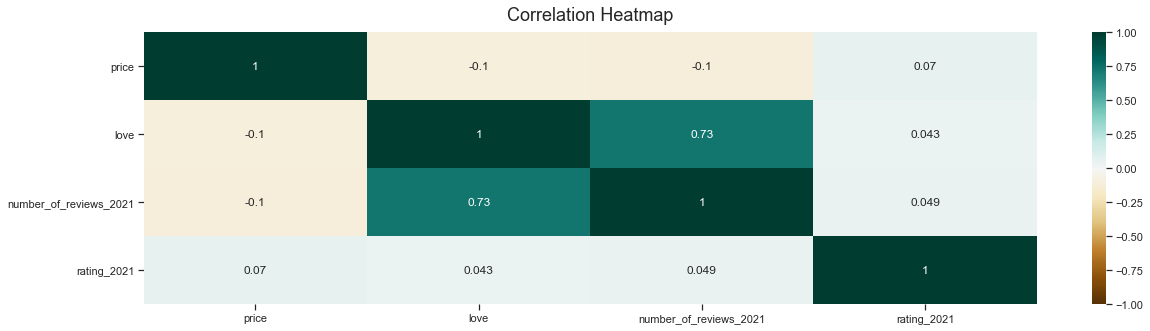

In [128]:
heatmap = sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [129]:
# df_splom['love']= np.log(df_splom['love'].clip(0.00000001, ))
# df_splom['number_of_reviews_2020'] = np.log(df_splom['number_of_reviews_2020'])
# df_splom['price'] = df_splom['price'].clip(0, 150)

In [133]:
df_splom.describe(percentiles = (0,0.98))

,price,love,number_of_reviews_2021,rating_2021
count,3902.000000,3.902000e+03,3902.000000,3902.000000
mean,45.323232,3.150538e+04,743.055613,4.267932
std,36.530425,5.977794e+04,1422.549170,0.255770
min,2.000000,0.000000e+00,4.000000,3.120300
0%,2.000000,0.000000e+00,4.000000,3.120300
50%,34.000000,1.420000e+04,292.000000,4.280800
98%,140.000000,1.934760e+05,4870.880000,4.739700
max,549.000000,1.300000e+06,19576.000000,4.921900


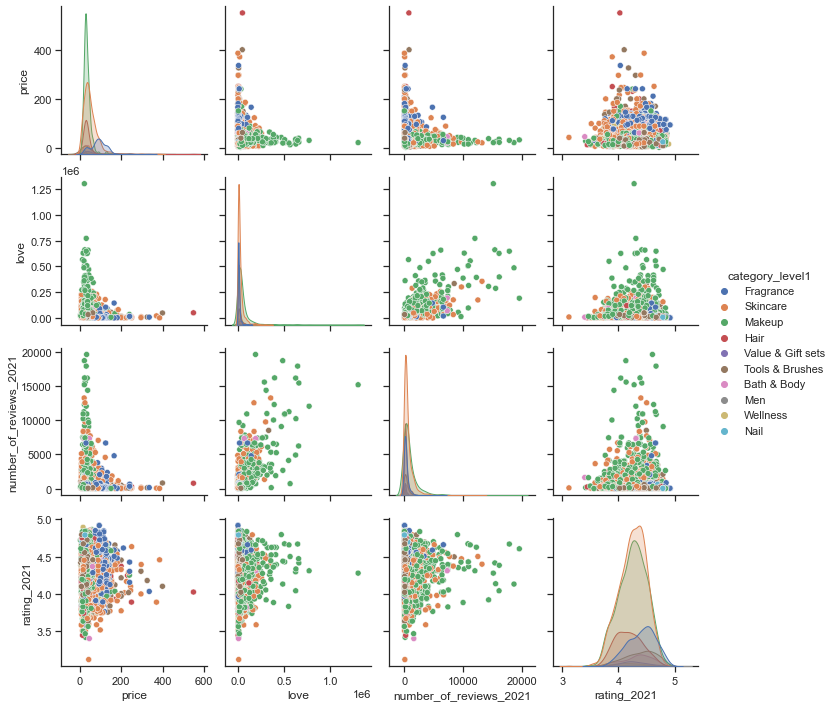

In [134]:
#df = sns.load_dataset("penguins")
sns.pairplot(df_splom, hue="category_level1")

## Analyzie in category level

In [135]:
df_product_review_2_year.sum()

Product_id                                    P163604P307801P388670P405269P388770P388766P398...
name                                          ColoniaFico di AmalfiRosa NobileMediterranean ...
size                                          0.7 oz/ 20 mL5 oz/ 148 mL3.4 oz/ 101 mL1.7 oz/...
brand                                         Acqua Di ParmaAcqua Di ParmaAcqua Di ParmaAERI...
category                                      ColognePerfumePerfumePerfumePerfumePerfumeLip ...
category_level1                               FragranceFragranceFragranceFragranceFragranceF...
category_level2                               FragranceFragranceFragranceFragranceFragranceF...
price                                                                                    152137
value_price                                                                              153903
URL                                           https://www.sephora.com/product/colonia-P16360...
love                                    

In [208]:
df_product_review_2_year.groupby('category_level1')\
.agg({"price":'median', "Product_id":'count',"number_of_reviews_2021_pandamic_calculated":["median",'mean','max','min','sum'],"2_year_product_rating_diff":"mean" })\
.apply(lambda x: np.round(x, 2))\
.sort_values(by = ("price",'median'), ascending = False)\
.style.bar(color = 'lightblue')

In [138]:
df_product_review_2_year.groupby('category_level2')\
.agg({"price":'median', "number_of_reviews_2021_pandamic_calculated":["median",'mean','max','min','sum'],"2_year_product_rating_diff":"mean" })\
.apply(lambda x: np.round(x, 2))\
.sort_values(by = ("price",'median'), ascending = False)\
.style.bar(color = 'lightblue')

In [139]:
mapper3 = df_product_review_finall_all['name'].to_dict()

### Top 1 review product per category level 1

In [140]:
df_result = df_product_review_finall_all.groupby('category_level1')\
.agg({"Product_id":"count","price":'median', "2_year_product_review_diff":["mean",'max','min','sum', 'idxmax'],"2_year_product_rating_diff":"mean" })\
.apply(lambda x: np.round(x, 2))\
.sort_values(by = ("Product_id",'count'), ascending = False)

df_result[('2_year_product_review_diff', 'idxmax')] = df_result[('2_year_product_review_diff', 'idxmax')].map(mapper3)

df_result.style.bar(color = 'lightblue')

## visualize the matrix of reviews changed vs rating changed 

In [141]:
review_count = df_product_review_2_year['2_year_product_review_diff'].clip(-1000,1000)
rating = df_product_review_2_year['2_year_product_rating_diff']

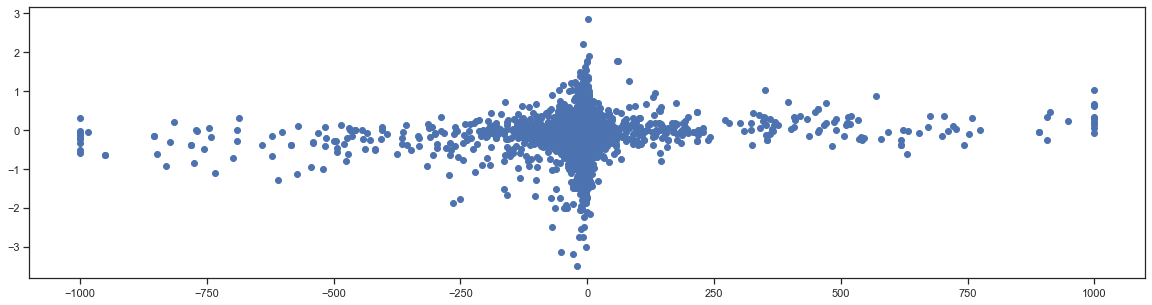

In [142]:
plt.scatter(review_count, rating)

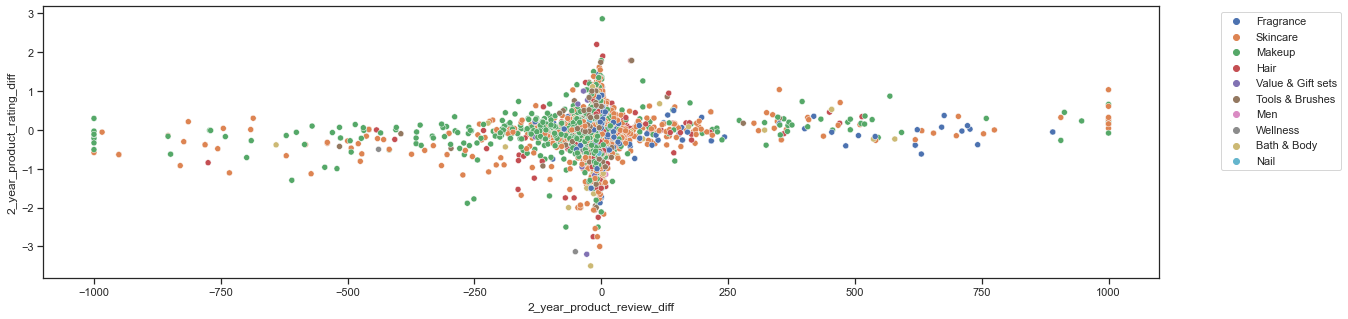

In [143]:
sns.scatterplot(data = df_product_review_2_year, x=review_count, y = rating, hue = 'category_level1');
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left');

/Users/Destiny/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


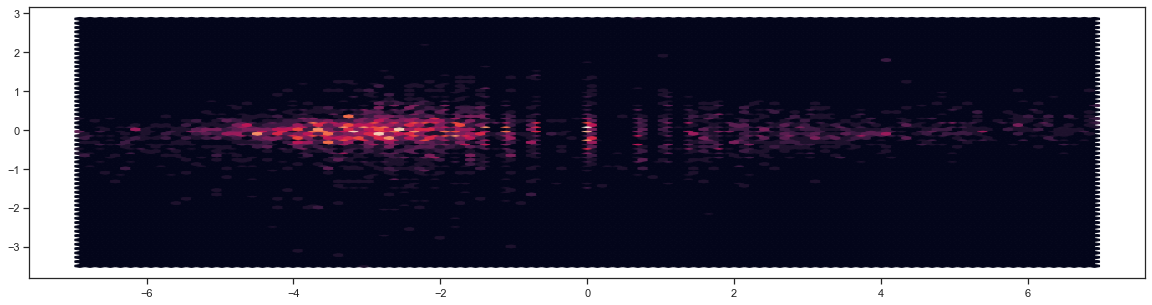

In [144]:
plt.hexbin(np.sign(review_count)*np.log(np.abs(review_count)), rating)

In [145]:
## use machine learning to categorize

In [146]:
df_mc_list = ["price","category_level1",'number_of_reviews_2021',
                                'rating_2021', 
                                 'Calculated_Rating_avg_2020-2021',
                                '2_year_product_review_diff',
                                '2_year_product_rating_diff',
                                 ]

In [147]:
df_mc=df_product_review_2_year.loc[:,df_mc_list].copy()

In [148]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [149]:
df_mc = pd.get_dummies(df_mc)

In [150]:
#df_mc

In [151]:
scaler = StandardScaler()

In [152]:
df_mc = scaler.fit_transform(df_mc)

In [153]:
model = KMeans(4)

In [154]:
model.fit(df_mc)

KMeans(n_clusters=4)

In [155]:
model.labels_

array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

In [156]:
df_product_review_2_year['clusters'] = model.labels_

In [157]:
df_product_review_2_year.loc[:,['Product_id','name',"size","brand","category_level1","category_level2","price",'love', 'number_of_reviews_2021',
                                'rating_2021', 
                                 'Calculated_Rating_avg_2020-2021',
                                '2_year_product_review_diff',
                                '2_year_product_rating_diff','clusters']].to_csv('data/cluster_analysis_1.csv')

/Users/Destiny/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


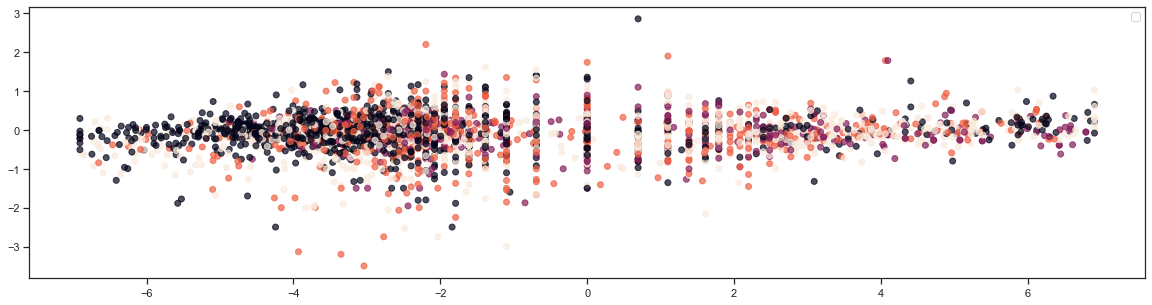

In [158]:
plt.scatter(np.sign(review_count)*np.log(np.abs(review_count)), rating, c = model.labels_, alpha = 0.7);
plt.legend()

In [159]:
df_mc_list = ["price",'love','category_level1', 'number_of_reviews_2021','2_year_product_rating_diff'
    
                                 ]

In [160]:
df_mc_selected_list = (df_product_review_2_year['2_year_product_review_diff']>=0) &\
                        (df_product_review_2_year['2_year_product_rating_diff']>=0)

In [161]:
df_selected=df_product_review_2_year.loc[df_mc_selected_list,:].copy()

In [162]:
df_mc_selected=df_product_review_2_year.loc[df_mc_selected_list,df_mc_list].copy()

In [163]:
df_mc_selected.head(2)

,price,love,category_level1,number_of_reviews_2021,2_year_product_rating_diff
4,130.0,5600,Fragrance,92,0.644444
33,38.0,14600,Hair,289,0.282738


In [164]:
df_mc_selected.shape

(404, 5)

In [165]:
df_mc_selected = pd.get_dummies(df_mc_selected)

In [166]:
#df_mc

In [167]:
scaler = StandardScaler()

In [168]:
df_mc_selected_new = scaler.fit_transform(df_mc_selected)

In [169]:
df_mc_selected[[i for i in df_mc_selected if 'category' in i]] = df_mc_selected[[i for i in df_mc_selected if 'category' in i]]/10

In [170]:
model2 = KMeans(4)

In [171]:
model2.fit(df_mc_selected_new)

KMeans(n_clusters=4)

In [172]:
model2.labels_

array([1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 3, 3, 3, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 2, 0, 1, 2, 0,
       1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 3, 3, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0,

In [173]:
df_selected['clusters'] = model2.labels_

In [174]:
df_selected.head(2)

,Product_id,name,size,brand,category,category_level1,category_level2,price,value_price,URL,love,FirstSubmissionTime,product_life,product_life_above_1,product_life_above_2,number_of_reviews_2021,number_of_reviews_2020,number_of_reviews_avg_2021,number_of_reviews_avg_2020,number_of_reviews_avg_diff,rating_2021,rating_2020,number_of_reviews_2021_pandamic_calculated,number_of_reviews_2020_b4pandamic,Calculated_Rating_avg_2020-2021,Calculated_Rating_avg_2019-2020,r_Submission_min_2021,2_year_product_review_diff,2_year_product_rating_diff,clusters
4,P388770,Amber Musk,1.7 oz/ 50 mL,AERIN,Perfume,Fragrance,Fragrance,130.0,130.0,https://www.sephora.com/product/amber-musk-P38...,5600,2014-09-30T02:42:38.000+00:00,6.506540,True,True,92,77,14.139620,13.983373,0.156247,4.3261,4.5,15.0,9.0,4.533333,3.888889,2020-04-26 00:44:19,6.0,0.644444,1
33,P406531,REVEAL Concentrated Color Correcting Drops,0.5 oz/ 15 mL,Algenist,Color Correct,Hair,Hair care,38.0,38.0,https://www.sephora.com/product/reveal-concent...,14600,2016-02-19T22:56:27.000+00:00,5.115189,True,True,289,269,56.498397,65.367587,-8.869190,3.7855,4.0,21.0,16.0,4.095238,3.812500,2020-04-01 19:31:55,5.0,0.282738,3


In [175]:
df_selected.loc[:,['Product_id','name',"size","brand","category_level1","category_level2","price",'love', 'number_of_reviews_2021',
                                'rating_2021', 
                                 'Calculated_Rating_avg_2020-2021',
                                '2_year_product_review_diff',
                                '2_year_product_rating_diff','clusters']].to_csv('data/cluster_analysis_selected_2.csv')

In [176]:
review_count_2 = df_selected['2_year_product_review_diff'].clip(-1000,1000)
rating_2 = df_selected['2_year_product_rating_diff']

/Users/Destiny/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


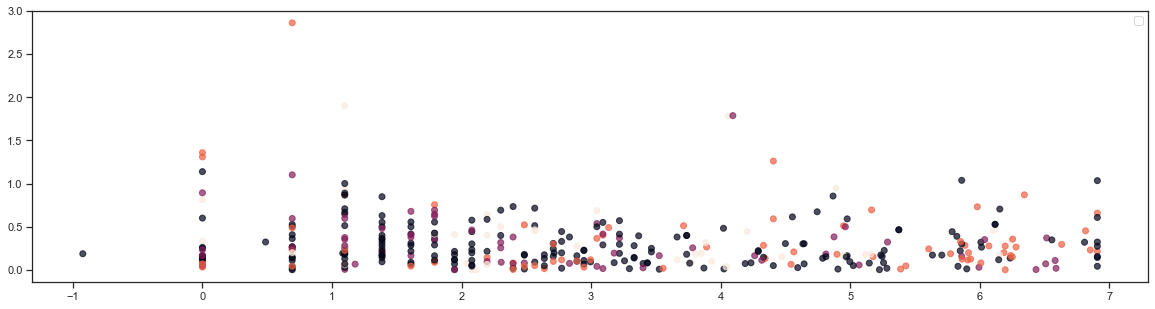

In [177]:
plt.scatter(np.sign(review_count_2)*np.log(np.abs(review_count_2)), rating_2, c = model2.labels_, alpha = 0.7);
plt.legend()

In [178]:
df_product_review_2_year.shape

(3317, 30)

In [179]:
#dataframe to analyze one year product life 
df_product_review_1_year = df_product_review_finall_all.loc[df_product_review_finall_all["product_life_above_1"]=="True",:].copy()

In [180]:
#df_product_review_1_year.sort_values(by = 'number_of_reviews_2021_pandamic', ascending = False)

In [181]:
df_product_review_1_year.shape

(3888, 29)

In [184]:
review_count_2021 = df_product_review_1_year['number_of_reviews_2021_pandamic_calculated'].clip(0,6000)
rating_2021 = df_product_review_1_year['Calculated_Rating_avg_2020-2021']

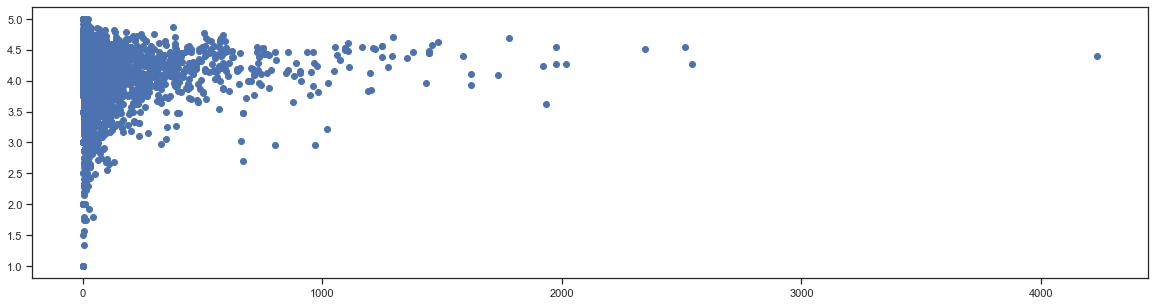

In [185]:
plt.scatter(review_count_2021, rating_2021)

# Review time series analysis 

In [188]:
df_reviews[df_reviews["Product_id_original"]=="P378716"].shape

(1679, 15)

In [189]:
df_reviews[(df_reviews["Product_id_original"]=="P378716") & (df_reviews['SubmissionTime']<'2020-04-01T18:00:00.000+00:00')].shape

(1609, 15)

In [190]:
df_example = df_reviews[(df_reviews["Product_id_original"]=="P378716")]

In [191]:
df_example.iloc[1000,:]

Id                                                                                          51729742
ProductId                                                                                    P378716
Rating                                                                                             5
Title                                                                                        amazing
ReviewText                                         I have continuously purchased this because it'...
IsRecommended                                                                                   None
SubmissionTime                                                         2015-10-25T16:29:47.000+00:00
ContextDataValues.skinType.ValueLabel                                                            NaN
ContextDataValues.eyeColor.ValueLabel                                                            NaN
ContextDataValues.hairColor.ValueLabel                                                     

In [192]:
df_reviews.head(2)

,Id,ProductId,Rating,Title,ReviewText,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,ContextDataDistribution.skinConcerns.ValueLabel,Product_id_original,review_submission_time
0,173658866,P443401,2,Too similar and no lasting power,I bought this because I already love Arancia d...,False,2021-02-15T18:09:41.000+00:00,Combination,Blue,Blonde,Fair,NaN,NaN,P443401,2021-02-15 18:09:41
1,173618877,P443401,1,None,Why is this 82$ when the value is lower? That ...,False,2021-02-14T17:22:53.000+00:00,Combination,Green,Blonde,Fair,NaN,NaN,P443401,2021-02-14 17:22:53


In [193]:
#group by category, see the review changes per category

In [194]:
df_reviews_2021.head(2)

,Id,ProductId,Rating,Title,ReviewText,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,ContextDataDistribution.skinConcerns.ValueLabel,Product_id_original,review_submission_time
0,173658866,P443401,2,Too similar and no lasting power,I bought this because I already love Arancia d...,False,2021-02-15T18:09:41.000+00:00,Combination,Blue,Blonde,Fair,NaN,NaN,P443401,2021-02-15 18:09:41
1,173618877,P443401,1,None,Why is this 82$ when the value is lower? That ...,False,2021-02-14T17:22:53.000+00:00,Combination,Green,Blonde,Fair,NaN,NaN,P443401,2021-02-14 17:22:53


In [195]:
df_reviews_2021['category_level1']=df_reviews_2021['ProductId'].map(mapper_product_category_1)
df_reviews_2021['category_level2']=df_reviews_2021['ProductId'].map(mapper_product_category_2)

In [196]:
df_reviews_2021["review_submission_time_d"] = pd.to_datetime(df_reviews_2021["review_submission_time"]).dt.floor('D')

In [197]:
df_reviews_2021_ts = df_reviews_2021.groupby(['review_submission_time_d',"category_level1"]).agg({"Id": 'count'}).reset_index()

In [198]:
df_reviews_2021_ts= df_reviews_2021_ts.set_index(["review_submission_time_d", 'category_level1']).unstack()

In [199]:
df_reviews_2021_ts.columns = [i[1] for i in df_reviews_2021_ts.columns]

In [200]:
#note that the two years data might not be comparable as the people might move from offline to online 

In [201]:
df_reviews_2021_ts.sum()

Bath & Body           10820.0
Fragrance             28982.0
Hair                  26535.0
Makeup                40058.0
Men                      56.0
Nail                    165.0
Skincare             158357.0
Tools & Brushes        4877.0
Value & Gift sets      2198.0
Wellness               2250.0
dtype: float64

In [202]:
df_reviews_2021_ts = df_reviews_2021_ts.resample('W').sum()

In [203]:
# df_reviews_2021_ts = df_reviews_2021_ts.rolling('7D').mean()

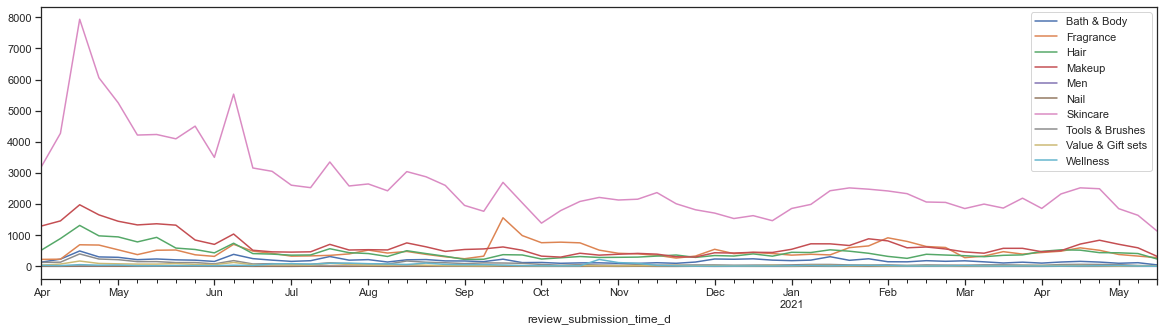

In [204]:
# plt.plot( df_reviews_2021_ts, );
df_reviews_2021_ts.fillna(0).plot()
plt.legend()

In [229]:
df_reviews_2021_ts = df_reviews_2021.groupby(['review_submission_time_d',"category_level1"]).agg({"Rating": 'mean'}).reset_index()

In [234]:
df_reviews_2021_ts

,Bath & Body,Fragrance,Hair,Makeup,Men,Nail,Skincare,Tools & Brushes,Value & Gift sets,Wellness
review_submission_time_d,,,,,,,,,,
2020-04-30,4.159558,4.468851,4.083708,4.227438,3.333333,3.511111,4.094536,4.310526,4.090656,4.084783
2020-05-31,4.080371,4.351496,3.974742,4.172324,4.400000,4.495370,4.044312,4.275420,3.927988,3.495476
2020-06-30,4.012928,4.183695,3.969837,4.094330,4.000000,4.533333,4.104236,4.193013,4.047297,3.910454
2020-07-31,3.964612,4.246381,3.931812,4.006365,3.900000,4.166667,4.063278,4.298492,4.034181,3.805428
2020-08-31,4.054019,4.123182,3.921924,4.135726,4.428571,4.307692,4.123173,4.196215,3.923692,3.625098
2020-09-30,3.984510,4.227604,3.928989,4.147809,5.000000,4.666667,4.159095,4.260721,4.010417,4.078955
2020-10-31,3.793495,4.323139,3.899657,3.997367,5.000000,4.562500,4.201725,4.114910,4.112778,4.579819
2020-11-30,4.007848,4.210337,3.979838,3.972425,3.400000,4.142857,4.227073,4.201865,3.905102,4.387694
2020-12-31,4.228383,4.320427,4.113024,4.021022,5.000000,3.666667,4.119824,3.762762,4.167931,4.052500


In [230]:
df_reviews_2021_ts= df_reviews_2021_ts.set_index(["review_submission_time_d", 'category_level1']).unstack()

In [231]:
df_reviews_2021_ts.columns = [i[1] for i in df_reviews_2021_ts.columns]

In [232]:
df_reviews_2021_ts = df_reviews_2021_ts.resample('M').mean()

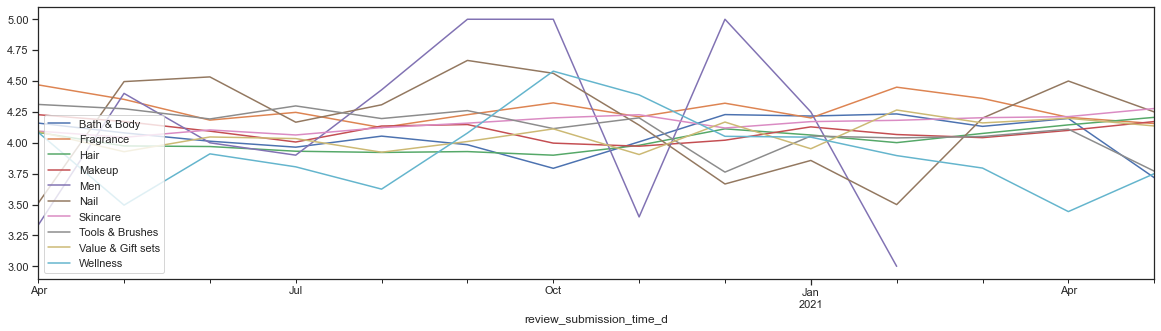

In [233]:
# plt.plot( df_reviews_2021_ts, );
df_reviews_2021_ts.plot()
plt.legend()

<AxesSubplot:xlabel='review_submission_time_d'>

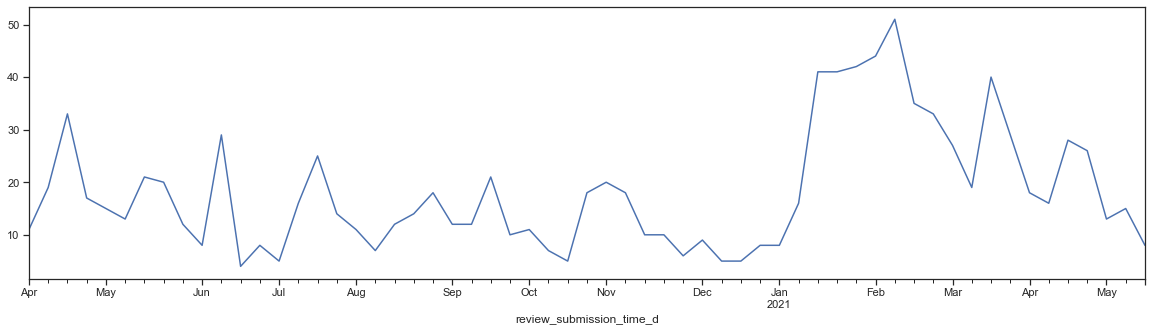

In [303]:
df_reviews_2021.set_index('review_submission_time_d')['ReviewText'].str.lower().str.contains('covid|pandemic|virus').resample('W').sum().plot()

In [304]:
df_covid = df_reviews_2021.set_index(['review_submission_time_d', 'category_level1'])['ReviewText'].str.lower().str.contains('covid|pandemic|virus')

In [305]:
df_covid = pd.DataFrame(df_covid)

In [306]:
df_covid = df_covid.reset_index()

In [307]:
df_covid = df_covid.groupby(['review_submission_time_d', 'category_level1'])['ReviewText'].sum().unstack()

<AxesSubplot:xlabel='review_submission_time_d'>

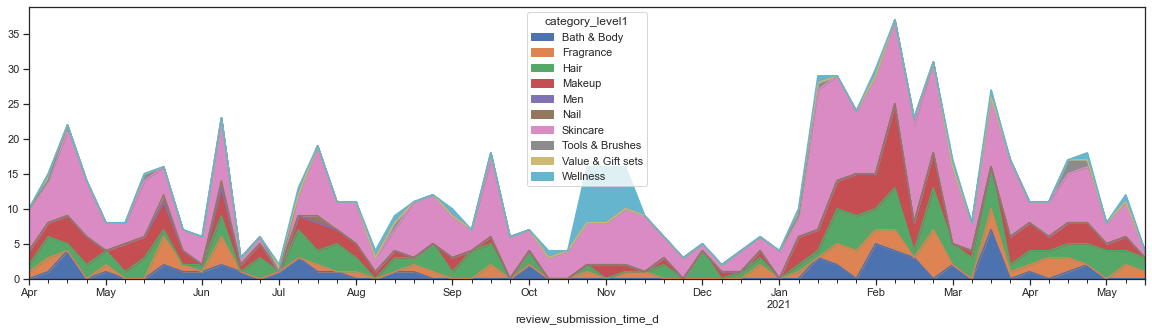

In [308]:
df_covid.resample('W').sum().plot(kind = 'area')

In [309]:
df_covid = df_covid.resample('W').sum()

In [310]:
df_covid['sum'] = df_covid.sum(axis = 1)

In [311]:
df_covid.columns

Index(['Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Men', 'Nail', 'Skincare',
       'Tools & Brushes', 'Value & Gift sets', 'Wellness', 'sum'],
      dtype='object', name='category_level1')

In [312]:
for i in ['Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Men', 'Nail', 'Skincare',
       'Tools & Brushes', 'Value & Gift sets', 'Wellness', 'sum']:
    df_covid[i] = df_covid[i]/df_covid['sum']

<AxesSubplot:xlabel='review_submission_time_d'>

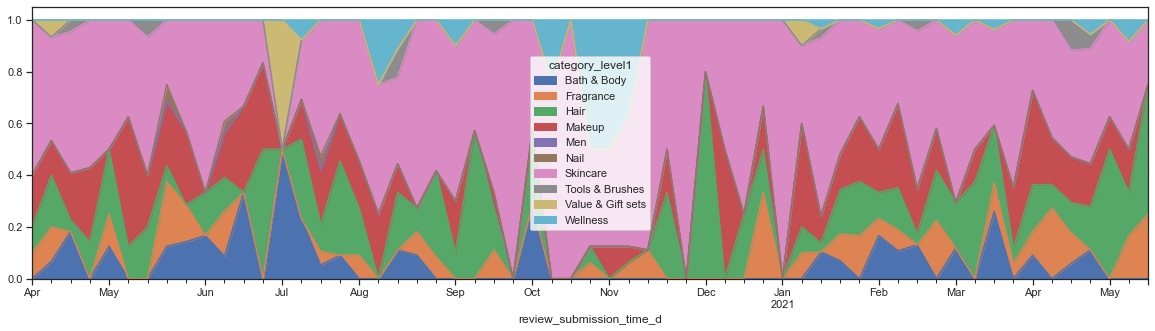

In [313]:
df_covid.iloc[:, :-1].plot(kind = 'area')

# Joy

<AxesSubplot:xlabel='review_submission_time_d'>

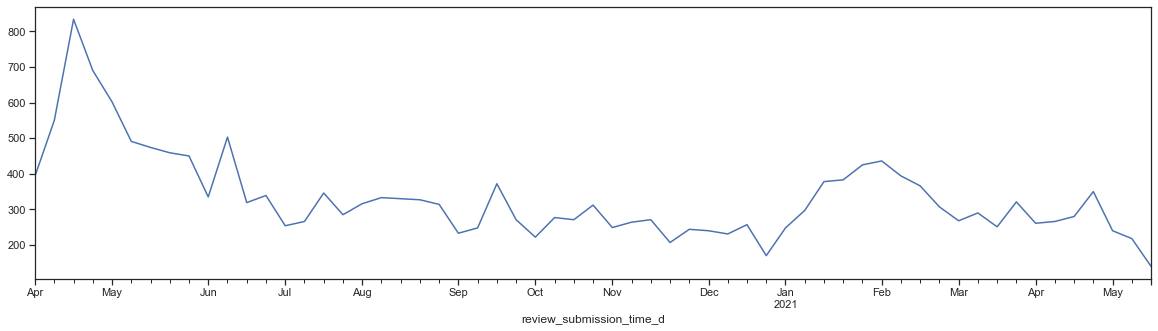

In [261]:
df_reviews_2021.set_index('review_submission_time_d')['ReviewText'].str.lower().str.contains('happy|joy|happiness|relax').resample('W').sum().plot()

In [289]:
df_covid = df_reviews_2021.set_index(['review_submission_time_d', 'category_level1'])['ReviewText'].str.lower().str.contains('happy|joy|happiness|relax')

In [290]:
df_covid = pd.DataFrame(df_covid)

In [291]:
df_covid = df_covid.reset_index()

In [292]:
df_covid = df_covid.groupby(['review_submission_time_d', 'category_level1'])['ReviewText'].sum().unstack()

<AxesSubplot:xlabel='review_submission_time_d'>

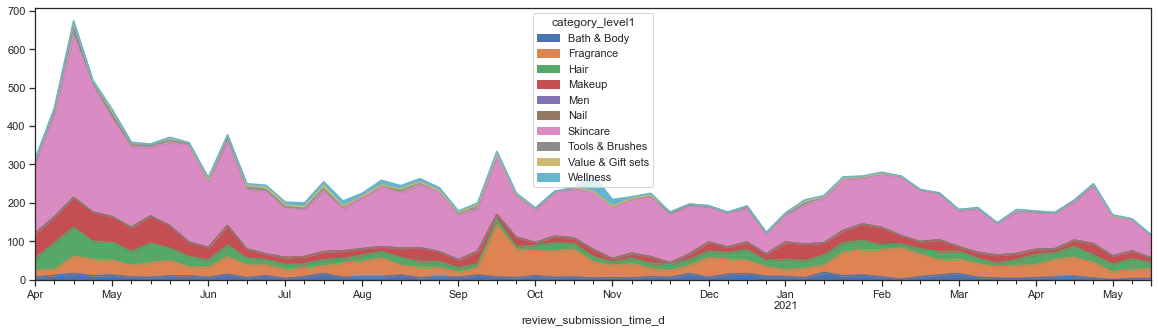

In [293]:
df_covid.resample('W').sum().plot(kind = 'area')

In [294]:
df_covid = df_covid.resample('W').sum()

In [295]:
df_covid['sum'] = df_covid.sum(axis = 1)

In [297]:
df_covid.columns

Index(['Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Men', 'Nail', 'Skincare',
       'Tools & Brushes', 'Value & Gift sets', 'Wellness', 'sum'],
      dtype='object', name='category_level1')

In [300]:
for i in ['Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Men', 'Nail', 'Skincare',
       'Tools & Brushes', 'Value & Gift sets', 'Wellness', 'sum']:
    df_covid[i] = df_covid[i]/df_covid['sum']

<AxesSubplot:xlabel='review_submission_time_d'>

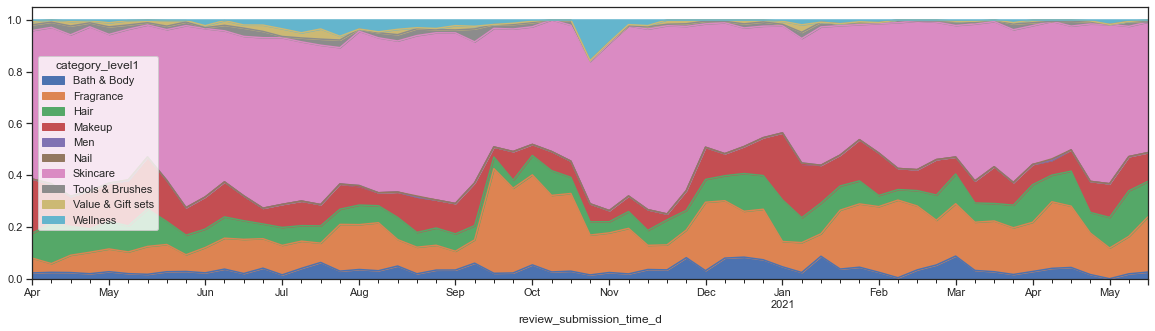

In [302]:
df_covid.iloc[:, :-1].plot(kind = 'area')

In [236]:
df_reviews_2021

,Id,ProductId,Rating,Title,ReviewText,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,ContextDataDistribution.skinConcerns.ValueLabel,Product_id_original,review_submission_time,category_level1,category_level2,review_submission_time_d
0,173658866,P443401,2,Too similar and no lasting power,I bought this because I already love Arancia d...,False,2021-02-15T18:09:41.000+00:00,Combination,Blue,Blonde,Fair,NaN,NaN,P443401,2021-02-15 18:09:41,Fragrance,Fragrance,2021-02-15
1,173618877,P443401,1,None,Why is this 82$ when the value is lower? That ...,False,2021-02-14T17:22:53.000+00:00,Combination,Green,Blonde,Fair,NaN,NaN,P443401,2021-02-14 17:22:53,Fragrance,Fragrance,2021-02-14
2,167552732,P443401,4,"Not long lasting enough, a bit too feminine",I had a few of these as samples and really lik...,True,2020-12-10T05:36:56.000+00:00,Combination,Brown,Brunette,Light,NaN,NaN,P443401,2020-12-10 05:36:56,Fragrance,Fragrance,2020-12-10
3,165457313,P443401,3,"Great scents, no lasting power",Fell in love with Acqua Di Parma during a stay...,True,2020-11-10T21:32:24.000+00:00,Combination,Brown,Brunette,Light,NaN,NaN,P443401,2020-11-10 21:32:24,Fragrance,Fragrance,2020-11-10
4,158567125,P443401,5,None,I've had this set for a year now and I constan...,True,2020-06-23T02:52:58.000+00:00,Normal,Brown,Brunette,Porcelain,NaN,NaN,P443401,2020-06-23 02:52:58,Fragrance,Fragrance,2020-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,155116225,P420024,5,None,I love this set of eye brushes! It is perfect!...,True,2020-04-19T21:38:26.000+00:00,Combination,Brown,Brunette,Medium,NaN,NaN,P420024,2020-04-19 21:38:26,Tools & Brushes,Eye Brushes,2020-04-19
2,155003891,P420024,5,None,Great brushes! The hold eyeshadow well and bl...,True,2020-04-16T20:09:40.000+00:00,Normal,Brown,Auburn,Medium,NaN,NaN,P420024,2020-04-16 20:09:40,Tools & Brushes,Eye Brushes,2020-04-16
3,154977781,P420024,4,None,Brushes are great for the price! Minus one sta...,True,2020-04-16T04:23:00.000+00:00,Normal,Brown,Brunette,Light,NaN,NaN,P420024,2020-04-16 04:23:00,Tools & Brushes,Eye Brushes,2020-04-16
4,154910549,P420024,5,Great deal for the money,Brushes are great. Nice for travel. Excellent ...,True,2020-04-15T19:38:12.000+00:00,Normal,Brown,Brunette,Olive,NaN,NaN,P420024,2020-04-15 19:38:12,Tools & Brushes,Eye Brushes,2020-04-15


In [205]:
df_reviews_2020.head(2)

,Id,ProductId,Rating,Title,ReviewText,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,ContextDataDistribution.skinConcerns.ValueLabel,Product_id_original,review_submission_time
5,132084231,P443401,5,None,"I really love this set, I can have 5 different...",True,2019-09-04T21:00:50.000+00:00,Combination,Brown,Black,Light,NaN,NaN,P443401,2019-09-04 21:00:50
6,131354293,P443401,1,None,Love every scent in this set. My old time favo...,False,2019-08-11T19:49:39.000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,P443401,2019-08-11 19:49:39


In [206]:
df_reviews_2021_temp = df_reviews_2021.groupby('Product_id_original').agg({"Rating": "mean", "Id": "count",'review_submission_time':'min'})\
.reset_index().rename(columns = {"Product_id_original":'Product_id', 'Rating':'r_Rating_avg_2021',\
                                 'Id':'r_Review_count_2021','review_submission_time':'r_Submission_min_2021'})

### Data manipulation

In [ ]:
df_product_list.head(1)

In [ ]:
product_info_list =['Product_id', 'name','category','brand', 'rating', 'number_of_reviews','love','price','URL']

In [ ]:
df_product_mapper = df_product_list.loc[:,product_info_list]

df_reviews.head(2)

In [ ]:
df_product.shape

In [ ]:
pandemic = df_reviews.groupby('Product_id_original')['SubmissionTime'].min()<='2020-04-01T00:00:00.00+00:00'

In [ ]:
pandemic

# Appendix

In [ ]:
df_product.head(5)

In [ ]:
df_reviews['ContextDataValues.age.ValueLabel'].fillna('Null').value_counts()

In [ ]:
# def translator_pid_id(df, traslate_df):
#     df['id'] = df['id'].astype(str)
#     mapper = df[['id', 'Product_id']].set_index('id').to_dict()['Product_id']
#     target_df = traslate_df.copy()
#     target_df['Product_id'] = target_df['Product_id'].map(mapper).fillna(target_df['Product_id'])
#     return target_df

In [ ]:
# df_product = translator_pid_id(df_product_list, df_product)

## Missing due to no reviews total 27

In [ ]:
df_filtered = pd.read_csv('./data/filtered sephora reviews.csv')

In [ ]:
len(df_filtered)

In [ ]:
df_filtered['Product_id'] = df_filtered['URL'].str.findall('P[0-9]{4,15}').apply(lambda x: x[0] if x!=[] else None)

In [ ]:
len(set(df_product.Product_id) & set(df_product_list.Product_id))

In [ ]:
# set(df_product.Product_id) - set(df_product_list.Product_id)

In [ ]:
len(set(df_filtered.Product_id) - set(df_product.Product_id_original))

In [ ]:
df_missing = df_filtered.loc[df_filtered.Product_id.isin((set(df_filtered.Product_id) - set(df_product.Product_id_original))),:]

In [ ]:
len(df_product)

In [ ]:
df_original = df_product_list.loc[df_product_list.id.isin(df_filtered['id'].astype(str)),:]

In [ ]:
df_original.loc[df_original.id.isin(df_missing.id.astype(str)), :].to_csv('data/27_missing.csv')

### Remove duplicated lines

In [ ]:
df_product = pd.read_pickle('data/all_products.pkl')

In [ ]:
df_reviews = pd.read_pickle('data/all_reviews.pkl')

In [ ]:
df_product = df_product[~df_product.duplicated(subset = ['Product_id_original'])]

In [ ]:
df_reviews = df_reviews[~df_reviews.duplicated()]

##### Test The % of time during pandemic covered by the selected 3000 reviews

In [ ]:
df_reviews

In [ ]:
df_product['RatingDistribution'].values[0]

In [ ]:
pandemic = (df_reviews.groupby('Product_id_original')['SubmissionTime'].min()<='2020-04-01T00:00:00.00+00:00').sum()

In [ ]:
pre_pandemic = (df_reviews.groupby('Product_id_original')['SubmissionTime'].min()<='2019-04-01T00:00:00.00+00:00').sum()

In [ ]:
pandemic / df_product.Product_id_original.nunique()

In [ ]:
pre_pandemic / df_product.Product_id_original.nunique()

In [ ]:
df_reviews.Product_id_original.nunique()

In [ ]:
df_product.to_pickle('data/all_products_no_dup.pkl')

In [ ]:
df_reviews.to_pickle('data/all_reviews_no_dup.pkl')

In [ ]:
df_product[df_product.duplicated('Product_id_original', keep = False)]

In [ ]:
with open('data/scope_list.pkl', 'rb') as file:
    scope_lst = pickle.load(file)

In [ ]:
len(scope_lst)

In [ ]:
df_all = pd.read_pickle('data/all_products.pkl')

In [ ]:
df_all[df_all['Product_id_original'] == 'P236816'] 2324705

## there are 99% products that have product life more than 1 year

In [ ]:
df_product_2020_2021[df_product_2020_2021['product_life']>=2].shape

In [ ]:
df_product_2020_2021

In [ ]:
3317/3902

## there are 85% products that have product life more than 2 years

In [ ]:
df_product_2020_2021[df_product_2020_2021['product_life']<1].shape

### there are 14 products that have product life less than 1 year. 

In [ ]:
df_product_2020_2021[df_product_2020_2021['product_life']>=1].shape

In [ ]:
3888/3902